dimension:
 450 375


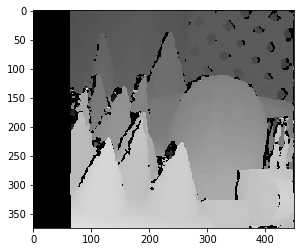

In [115]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
%matplotlib inline

displ=Image.open('MYLEFT IMAGE.png')
#displ=Image.open('MYLEFT IMAGE.png')
m,n=displ.size
displp=displ.load()
plt.imshow(displ)
print("dimension:\n",m,n)
dl=list(displ.getdata())


dimension :
 450 375


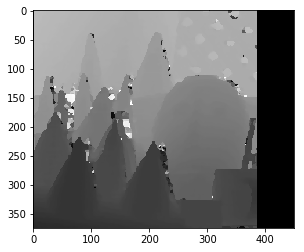

In [116]:
dispr=Image.open('MYRIGHT IMAGE.png')
a,b=dispr.size
plt.imshow(dispr)
disprp=dispr.load()
print("dimension :\n",a,b)
dr=list(dispr.getdata())


In [117]:
import numpy as np
import imageio
occ=([0]*n)*m
occ2=np.array(occ)
print("occluded matrix:\n",occ2)


pixels=displ.load()#1st image
pix2=dispr.load() #2nd image

#convert left disp to rgb and load it as matrix
im=displ.convert('RGB')
im2 = im.load()

#compare left and right disparities for finding occluded pixels
k=0
for i in range(m):
    for j in range(n):
        c=pixels[i,j]       #coordinates of left image at pos i,j
        if(j-c>=0):
            a=j-c
            cor=pix2[i,a]         
            if(abs(c-cor)>50):        # abs(dl[i][j]-dr[i][j-dl[i][j]])>1)
                occ2[i]=1                      #consider dr[i][j-dl[i][j]]
                k=k+1  
                im2[i,j]=0
            else:
                occ2[i]=0#but dl[i][j]=c   and    j-dl[i][j]= j-c  and a=j-c  and dr[i][a]
print(occ2)                                #dr[i][a]== cor ==pix2[i,j]
print("occluded pixels:",k)
im.save('newdispl.png')

occluded matrix:
 [0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
occluded pixels: 72755


occluded pixels in left img: 129750


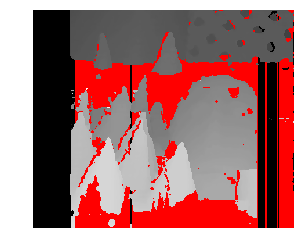

In [118]:
#highligting occluded pixels in left disp 
from PIL import Image,ImageColor,ImageDraw
global k

def change(level):
    k=0
    imgl = Image.open('newdispl.png')
    im = imgl.convert('RGB')
    width, height = im.size
    pixel_values =im.load()

    for i in range(width):
            for j in range(height):
                if(occ2[i]==1):
                    #pixels[i,j]=0
                    k=k+1
                    r,g,b=pixel_values[(i,j)]
                    rb, gb, bb = pixel_values[(i,j)]
                    if not (r+g+b+rb+gb+bb): #all values 0
                        pixel_values[i,j] = (255,0,0,0)

    print("occluded pixels in left img:",k)
    return im

res=change(100)
plt.axis('off')
plt.imshow(res)
#res.show()
res.save('resl.png')


In [119]:
#finding occluded pixels in right image
import numpy as np
import imageio
occ=([0]*n)*m
occ2=np.array(occ)
print("occluded matrix:\n",occ2)


pixels=displ.load()#1st image
pix2=dispr.load() #2nd image

im=dispr.convert('RGB')
im2 = im.load()

k=0
for i in range(m):
    for j in range(n):
        c=pixels[i,j]       #coordinates of left image at pos i,j
        if(j-c>=0):
            a=j-c
            cor=pix2[i,a]         
            if(abs(c-cor)>50):        # abs(dl[i][j]-dr[i][j-dl[i][j]])>1)
                occ2[i]=1                      #consider dr[i][j-dl[i][j]]
                k=k+1  
                im2[i,j]=0
            else:
                occ2[i]=0     #but dl[i][j]=c   and    j-dl[i][j]= j-c  and a=j-c  and dr[i][a]
print(occ2)                                #dr[i][a]== cor ==pix2[i,j]
print("occluded pixels:",k)
im.save('newdispr.png')

occluded matrix:
 [0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
occluded pixels: 72755


occluded pixels in right image 129750


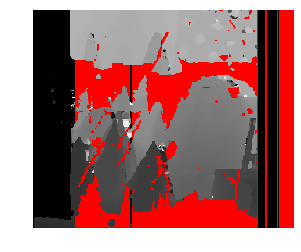

In [120]:
#highlighting occluded pixels in right disp
global pixel_values2

def change2(level):
    k=0
    imgr = Image.open('newdispr.png')
    im2 = imgr.convert('RGB')
    width, height = im2.size
    pixel_values2 =im2.load()
    
    for i in range(width):
            for j in range(height):
                if(occ2[i]==1):
                    k=k+1
                    r,g,b=pixel_values2[(i,j)]
                    rb, gb, bb = pixel_values2[(i,j)]
                    if not (r+g+b+rb+gb+bb): #all values 0
                        pixel_values2[i,j] = 255
                
    print("occluded pixels in right image",k)
    return im2  
   
res2=change2(100)
plt.axis('off')
plt.imshow(res2)
#res2.show()
res2.save('resr.png')

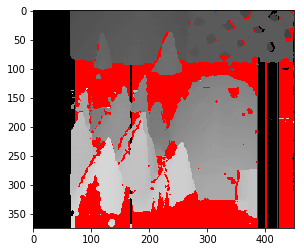

In [121]:
#initial image
#code to find neighbouring pixels of the occluded pixel
import matplotlib.image as ptimg 
import numpy as npy 
from numpy import asarray
from PIL import Image
  
# provide the location of image for reading  
m1 = Image.open("resl.png")
a=list(m1.getdata())
a1 = [x for sets in a for x in sets]
p1=m1.load()

#p1=npy.array(a)
# determining the length of original image 
w, h = m1.size
# xNew and yNew are new width and 
# height of image required  

xNew = int(w * 1 / 2) 
yNew = int(h * 1 / 2)
# calculating the scaling factor  
# work for more than 2 pixel  
xScale = xNew/(w-1) 
yScale = yNew/(h-1)

newImage = npy.zeros((h, w, 3), np.uint8)
#,npy.zeros([xNew, yNew, 4])];newImage=asarray(newImage);print(newImage)
for i in range(w):
    for j in range(h):
        newImage[j,i]=p1[i,j]
plt.imshow(newImage)


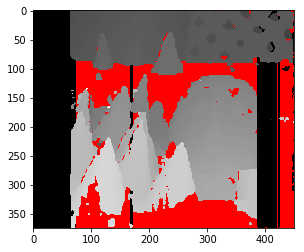

In [122]:
#calculate neighbouring occlusions and fill them
for i in range(w):
    for j in range(h):
        if (j>0 and j<(h - 1) and i>0 and i<(w - 1)):
            if(p1[i,j]==(255,0,0)):  #p1[i,j]==(255,0,0)
                a=min(p1[i,j+1],p1[i,j-1])
                b=min(p1[i+1,j],p1[i-1,j])
                c=min(a,b)
                d=min(p1[i-1,j+1],p1[i-1,j-1])
                e=min(c,d)
                f=min(p1[i+1,j+1],p1[i+1,j-1])
                g=min(e,f)
                newImage[j,i]=g

i= Image.fromarray(newImage,'RGB')
plt.imshow(i)
i.save('occl1.png')

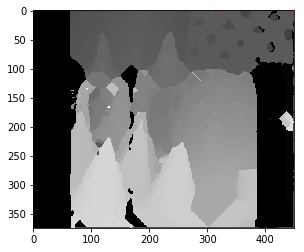

In [123]:
#iterating occl1.png 45 times to fill occlusion
#code to find neighbouring pixels of the occluded pixel
import matplotlib.image as ptimg 
import numpy as npy 
from numpy import asarray
from PIL import Image
for i in range(45):
        # provide the location of image for reading  
        m1 = Image.open("occl1.png")
        a=list(m1.getdata())
        a1 = [x for sets in a for x in sets]
        p1=m1.load()

        #p1=npy.array(a)
        # determining the length of original image 
        w, h = m1.size
        # xNew and yNew are new width and 
        # height of image required  

        xNew = int(w * 1 / 2) 
        yNew = int(h * 1 / 2)
        # calculating the scaling factor  
        # work for more than 2 pixel  
        xScale = xNew/(w-1) 
        yScale = yNew/(h-1)

        newImage = npy.zeros((h, w, 3), np.uint8)
        #,npy.zeros([xNew, yNew, 4])];newImage=asarray(newImage);print(newImage)
        for i in range(w):
            for j in range(h):
                newImage[j,i]=p1[i,j]
        plt.imshow(newImage)

        for i in range(w):
            for j in range(h):
                if (j>0 and j<(h - 1) and i>0 and i<(w - 1)):
                    if(p1[i,j]==(255,0,0)):  #p1[i,j]==(255,0,0)
                        a=min(p1[i,j+1],p1[i,j-1])
                        b=min(p1[i+1,j],p1[i-1,j])
                        c=min(a,b)
                        d=min(p1[i-1,j+1],p1[i-1,j-1])
                        e=min(c,d)
                        f=min(p1[i+1,j+1],p1[i+1,j-1])
                        g=min(e,f)
                        newImage[j,i]=g

        i= Image.fromarray(newImage,'RGB')
        plt.imshow(i)
        i.save('occl1.png')

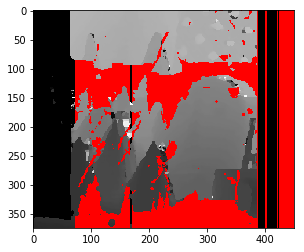

In [124]:
#initial image
#code to find neighbouring pixels of the occluded pixel
import matplotlib.image as ptimg 
import numpy as npy 
from numpy import asarray
from PIL import Image
  
# provide the location of image for reading  
m1 = Image.open("resr.png")
a=list(m1.getdata())
a1 = [x for sets in a for x in sets]
p1=m1.load()

#p1=npy.array(a)
# determining the length of original image 
w, h = m1.size
# xNew and yNew are new width and 
# height of image required  

xNew = int(w * 1 / 2) 
yNew = int(h * 1 / 2)
# calculating the scaling factor  
# work for more than 2 pixel  
xScale = xNew/(w-1) 
yScale = yNew/(h-1)

newImage = npy.zeros((h, w, 3), np.uint8)
#,npy.zeros([xNew, yNew, 4])];newImage=asarray(newImage);print(newImage)
for i in range(w):
    for j in range(h):
        newImage[j,i]=p1[i,j]
plt.imshow(newImage)


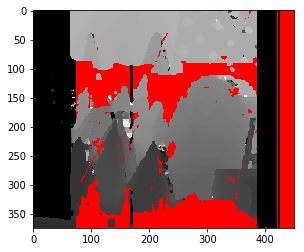

In [125]:
#calculate neighbouring occlusions and fill them
for i in range(w):
    for j in range(h):
        if (j>0 and j<(h - 1) and i>0 and i<(w - 1)):
            if(p1[i,j]==(255,0,0)):  #p1[i,j]==(255,0,0)
                a=min(p1[i,j+1],p1[i,j-1])
                b=min(p1[i+1,j],p1[i-1,j])
                c=min(a,b)
                d=min(p1[i-1,j+1],p1[i-1,j-1])
                e=min(c,d)
                f=min(p1[i+1,j+1],p1[i+1,j-1])
                g=min(e,f)
                newImage[j,i]=g

i= Image.fromarray(newImage,'RGB')
plt.imshow(i)
i.save('occr1.png')

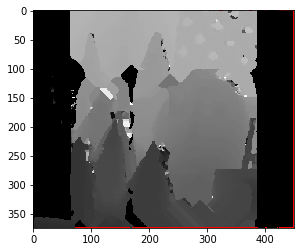

In [126]:
#iterating occl1.png 45 times to fill occlusion
#code to find neighbouring pixels of the occluded pixel
import matplotlib.image as ptimg 
import numpy as npy 
from numpy import asarray
from PIL import Image
for i in range(45):
        # provide the location of image for reading  
        m1 = Image.open("occr1.png")
        a=list(m1.getdata())
        a1 = [x for sets in a for x in sets]
        p1=m1.load()

        #p1=npy.array(a)
        # determining the length of original image 
        w, h = m1.size
        # xNew and yNew are new width and 
        # height of image required  

        xNew = int(w * 1 / 2) 
        yNew = int(h * 1 / 2)
        # calculating the scaling factor  
        # work for more than 2 pixel  
        xScale = xNew/(w-1) 
        yScale = yNew/(h-1)

        newImage = npy.zeros((h, w, 3), np.uint8)
        #,npy.zeros([xNew, yNew, 4])];newImage=asarray(newImage);print(newImage)
        for i in range(w):
            for j in range(h):
                newImage[j,i]=p1[i,j]
        plt.imshow(newImage)

        for i in range(w):
            for j in range(h):
                if (j>0 and j<(h - 1) and i>0 and i<(w - 1)):
                    if(p1[i,j]==(255,0,0)):  #p1[i,j]==(255,0,0)
                        a=min(p1[i,j+1],p1[i,j-1])
                        b=min(p1[i+1,j],p1[i-1,j])
                        c=min(a,b)
                        d=min(p1[i-1,j+1],p1[i-1,j-1])
                        e=min(c,d)
                        f=min(p1[i+1,j+1],p1[i+1,j-1])
                        g=min(e,f)
                        newImage[j,i]=g

        i= Image.fromarray(newImage,'RGB')
        plt.imshow(i)
        i.save('occr1.png')

